In [1]:
# import splitfolders
# input_folder='C:/Users/Corrupted/Desktop/S_Sorted_data'
# splitfolders.ratio(input_folder,output='C:/Users/Corrupted/Desktop/S_output',seed=42,ratio=(.7,.2,.1))

Copying files: 296 files [00:00, 497.09 files/s]


In [2]:
train_dir = 'C:/Users/Corrupted/Desktop/S_output/test'
test_dir = 'C:/Users/Corrupted/Desktop/S_output/train'
val_dir = 'C:/Users/Corrupted/Desktop/S_output/val'

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory(train_dir, label_mode="categorical",
                                          image_size=(224, 224), batch_size=32,
                                          shuffle=True, seed=42)
test_data = image_dataset_from_directory(test_dir, label_mode="categorical",
                                         image_size=(224, 224), batch_size=32,
                                         shuffle=False, seed=42)
val_data = image_dataset_from_directory(val_dir, label_mode="categorical",
                                        image_size=(224, 224), batch_size=32,
                                        shuffle=False, seed=42)

Found 30 files belonging to 2 classes.
Found 207 files belonging to 2 classes.
Found 59 files belonging to 2 classes.


In [4]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6,
                                              min_delta=0.0001)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2,
                                                 patience=4, min_lr=1e-7)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
n_class = 2
model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(224, 224, 3),
                                                  pooling='avg', classes=16,
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(n_class, activation='softmax'))

model.summary()

94765736/94765736 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [7]:
hist = model.fit(train_data, epochs=100, validation_data=val_data,
                 callbacks=[early_stop, reduce_lr])

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.6389 - accuracy: 0.6333 - val_loss: 2.0150 - val_accuracy: 0.3559 - lr: 0.0010
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 1.3953 - accuracy: 0.3667 - val_loss: 0.8935 - val_accuracy: 0.6441 - lr: 0.0010
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 0.3932 - accuracy: 0.7667 - val_loss: 1.5385 - val_accuracy: 0.6441 - lr: 0.0010
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 0.7828 - accuracy: 0.6333 - val_loss: 1.1695 - val_accuracy: 0.6441 - lr: 0.0010
Epoch 5/100
1/1 [==============================] - 4s 4s/step - loss: 0.4081 - accuracy: 0.7667 - val_loss: 0.6842 - val_accuracy: 0.6441 - lr: 0.0010
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 0.1866 - accuracy: 0.9667 - val_loss: 0.7673 - val_accuracy: 0.6102 - lr: 0.0010
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 0.2611 - accuracy: 0.866

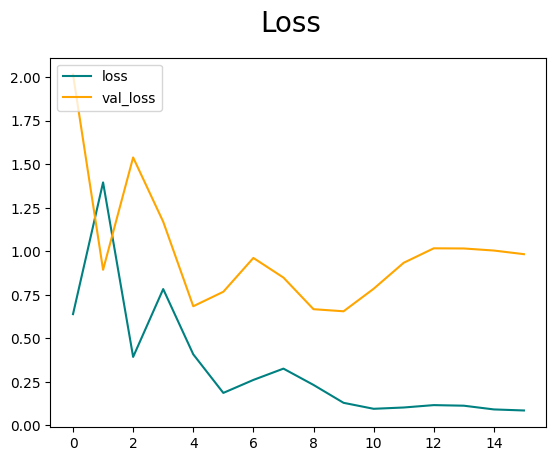

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

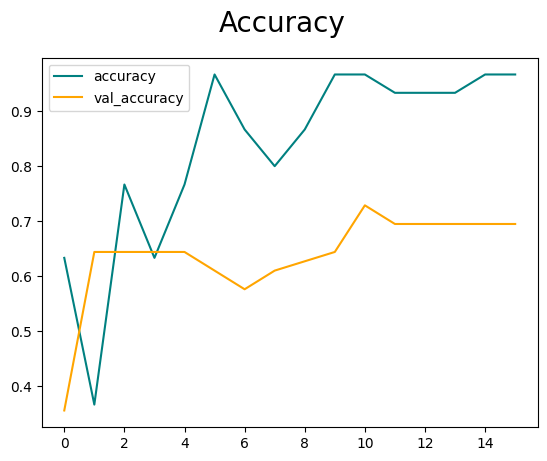

In [9]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [10]:
print(f"Training Accuracy: {hist.history['accuracy'][-1]}")
print(f"Validation Accuracy: {hist.history['val_accuracy'][-1]}")

Training Accuracy: 0.9666666388511658
Validation Accuracy: 0.694915235042572
